### Evaluation experiments

- Jaccard Coefficient: For vocabulary similarities (done)
- Positional Spearman's p Correlation Coefficient: Order of shared words could indicate semantic similarities?
- Semantic Embedding Similarity?

In [1]:
import pandas as pd

from slt_positional_bias.dataset import generate_merged_data_frame, sort_data_frame, store_df_as_parquet, load_parquet_as_df, normalize_and_tokenize, jaccard

df_name = "LLM-alias-fast-sample-count-20-1-2025-07-27 21h-08m-09s"
df = load_parquet_as_df(df_name)
# df

2025-07-27 21:14:07.209 | INFO     | slt_positional_bias.config:<module>:11 - PROJ_ROOT path is: C:\Users\Albert\Documents\SLT\slt_group_2_positional_bias
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Albert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df['jaccard'] = df.apply(lambda row: jaccard(row['oracle'], row['answer']), axis=1)
df

,topic_id,topic,rel_3_doc_position,nr_rel_3_doc,nr_rel_0_doc,oracle,answer,jaccard
0,2024-127266,what are some key challenges related to the re...,0,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.155738
1,2024-127266,what are some key challenges related to the re...,4,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.300752
2,2024-127266,what are some key challenges related to the re...,9,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.132353
3,2024-127266,what are some key challenges related to the re...,14,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.253968
4,2024-127266,what are some key challenges related to the re...,19,1,19,the e-waste recycling industry faces significa...,Some key challenges related to the recycling o...,0.185714
...,...,...,...,...,...,...,...,...
195,2024-96063,how using maps can impact your pedagogy,0,1,19,maps and map learning play a critical role in ...,Using maps can significantly impact your pedag...,0.239521
196,2024-96063,how using maps can impact your pedagogy,4,1,19,maps and map learning play a critical role in ...,Using maps can impact your pedagogy in several...,0.194805
197,2024-96063,how using maps can impact your pedagogy,9,1,19,maps and map learning play a critical role in ...,Using maps can impact your pedagogy in several...,0.205882
198,2024-96063,how using maps can impact your pedagogy,14,1,19,maps and map learning play a critical role in ...,Using maps can impact your pedagogy in several...,0.206061


In [6]:
df_jaccard = df.groupby('rel_3_doc_position')['jaccard'].mean().reset_index()
df_jaccard.columns = ['Position of oracle document', 'Jaccard coefficient']
df_jaccard['Position of oracle document'] = df_jaccard['Position of oracle document'] + 1
df_jaccard

store_df_as_parquet(df_jaccard, f"jaccard-{df_name}")

2025-07-27 23:03:10.861 | INFO     | slt_positional_bias.dataset:store_df_as_parquet:110 - Data frame saved to C:\Users\Albert\Documents\SLT\slt_group_2_positional_bias\data\processed\jaccard-LLM-alias-fast-sample-count-20-1-2025-07-27 21h-08m-09s-1-2025-07-27 23h-03m-10s.parquet


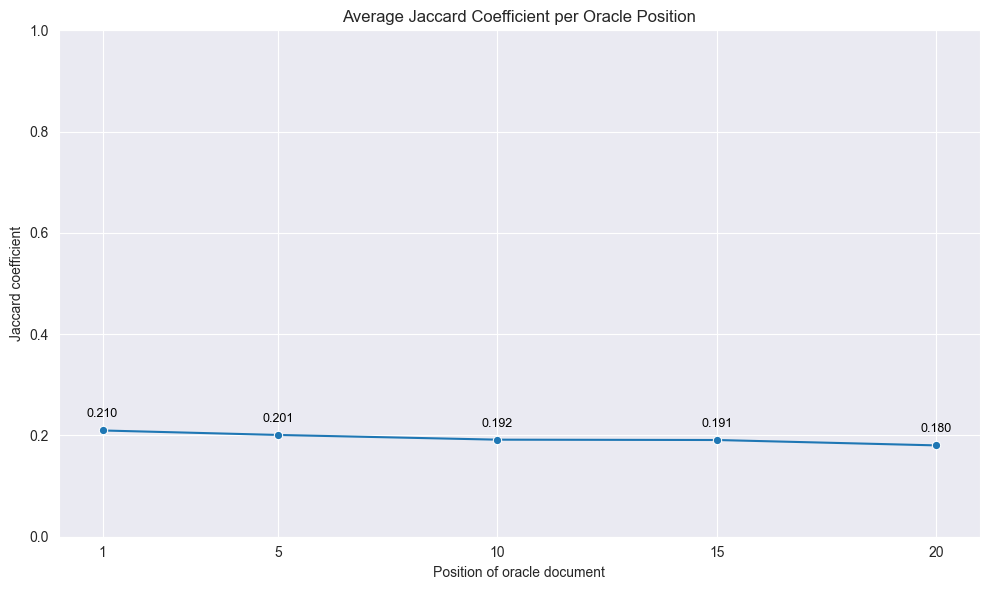

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from slt_positional_bias.plots import savefig

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_jaccard,
    x='Position of oracle document',
    y='Jaccard coefficient',
    marker='o'
)

plt.xticks(df_jaccard['Position of oracle document'])

title = 'Average Jaccard Coefficient per Oracle Position'

plt.title(title)
plt.xlabel('Position of oracle document')
plt.ylabel('Jaccard coefficient')
plt.xlim(0, 21)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()

for x, y in zip(df_jaccard['Position of oracle document'], df_jaccard['Jaccard coefficient']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontsize=9, color='black')

savefig(plt, title, df_name, 300)